C:\Users\91979\AppData\Local\Temp\ipykernel_10340\4148119719.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='Market Name', y='Modal Price (Rs./Quintal)', palette='viridis')


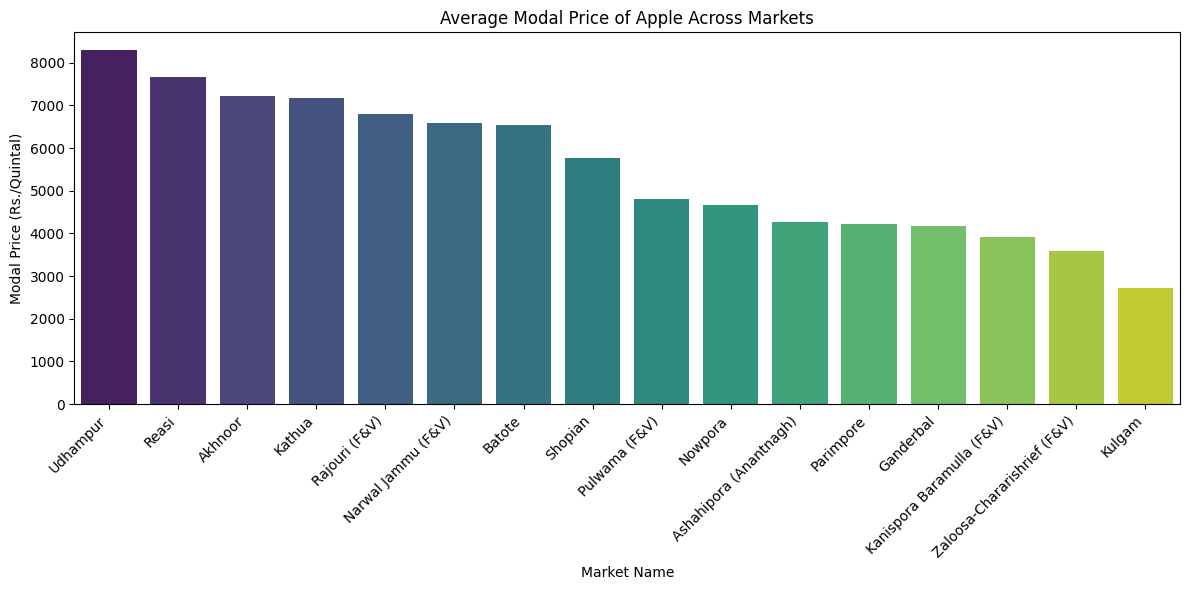

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv(r"C:\Users\91979\Desktop\PROJECTS111\PROJECTS\final_merged_dataset (1).csv")

# Filter for a specific commodity (e.g., Apple)
commodity_name = 'Apple'
df_filtered = df[df['Commodity'] == commodity_name]

# Group by Market and calculate average Modal Price
grouped = df_filtered.groupby('Market Name')['Modal Price (Rs./Quintal)'].mean().reset_index()

# Sort by price for better visualization
grouped = grouped.sort_values(by='Modal Price (Rs./Quintal)', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='Market Name', y='Modal Price (Rs./Quintal)', palette='viridis')
plt.title(f'Average Modal Price of {commodity_name} Across Markets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\91979\AppData\Local\Temp\ipykernel_7224\1323233342.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Price Date'] = pd.to_datetime(df['Price Date'])


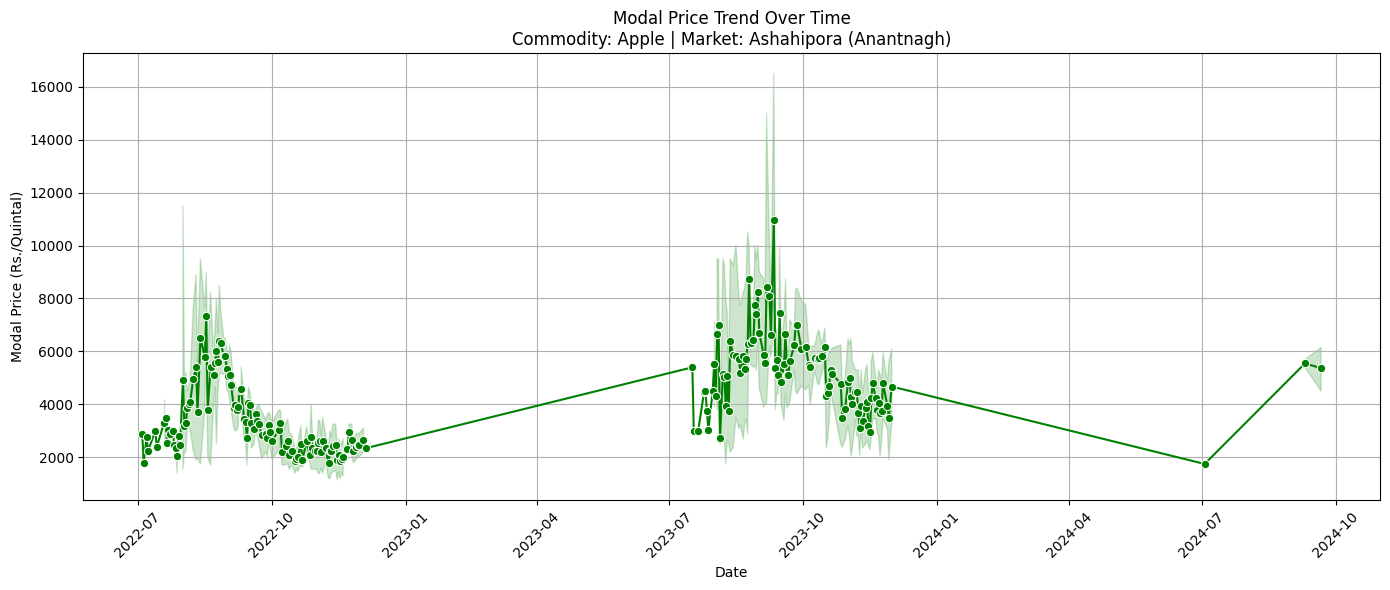

In [3]:
# Convert 'Price Date' to datetime
df['Price Date'] = pd.to_datetime(df['Price Date'])

# Select a specific commodity and market
commodity_name = 'Apple'
market_name = 'Ashahipora (Anantnagh)'

# Filter the dataset
df_filtered = df[(df['Commodity'] == commodity_name) & (df['Market Name'] == market_name)]

# Sort by date
df_filtered = df_filtered.sort_values('Price Date')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_filtered, x='Price Date', y='Modal Price (Rs./Quintal)', marker='o', color='green')
plt.title(f'Modal Price Trend Over Time\nCommodity: {commodity_name} | Market: {market_name}')
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [4]:

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\Ansa Rafiq\Desktop\pythonml\PROJECTSfinal\PROJECTS\final_merged_dataset (1).csv")

df = df.dropna(subset=['Modal Price (Rs./Quintal)'])  # Drop rows with missing target

df['Price Date'] = pd.to_datetime(df['Price Date'], errors='coerce')  # Convert date column if the value is other than numeric value
# it coverts into 
# # NAN
df = df.dropna(subset=['Price Date'])  # Remove rows with invalid dates

df['year'] = df['Price Date'].dt.year  # Extract year
df['month'] = df['Price Date'].dt.month  # Extract month


C:\Users\Ansa Rafiq\AppData\Local\Temp\ipykernel_5724\2284619151.py:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Price Date'] = pd.to_datetime(df['Price Date'], errors='coerce')  # Convert date column if the value is other than numeric value


In [3]:
df.head()

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,Temperature,year,month
0,Jammu,Akhnoor,Spinach,Other,FAQ,600.0,1000.0,800.0,2020-12-19,-3.68,2020,12
1,Jammu,Akhnoor,Spinach,Other,FAQ,700.0,900.0,800.0,2021-02-10,2.87,2021,2
2,Jammu,Akhnoor,Spinach,Other,FAQ,800.0,1000.0,900.0,2021-03-01,0.65,2021,3
3,Jammu,Akhnoor,Spinach,Other,FAQ,800.0,1000.0,900.0,2021-01-02,-2.69,2021,1
4,Jammu,Akhnoor,Spinach,Other,FAQ,800.0,1000.0,900.0,2021-03-02,2.75,2021,3


Reasons for Using Label Encoding in Your Case:
✅ 1. Random Forest Requires Numeric Input

Algorithms like Random Forest can’t work with text data.

Label Encoding assigns each category a unique number so the model can use them.

✅ 2. Categorical Features Have No Ordinal Relationship

Since features like Market Name and Commodity are just categories, one-hot encoding (OHE) could be an alternative.

But OHE creates too many columns (memory-heavy), so Label Encoding is better when you have many unique categories.
srinagar budgam ganderbal
1           0    0
0           1    0
0           0    1

le.fit(df[col])  # Step 1: Learn unique categories
df[col] = le.transform(df[col])  # Step 2: Replace text with numbers

Step 1: Learning Unique Categories (.fit())
When we run:
le = LabelEncoder()  
le.fit(df['Commodity'])
👉 The Label Encoder scans the column and finds the unique categories:

Apple → 0

Pea → 1

Walnut → 2

✅ At this point, the encoder remembers these mappings.
Step 2: Replacing Text with Numbers (.transform())
Now, when we run:
df['Commodity'] = le.transform(df['Commodity'])
👉 It replaces each value in the column with its assigned number:

Commodity (Original)	Commodity (Encoded)
Apple	0
Walnut	2
Pea	1
Walnut	2
✅ The column is now numeric, ready for use in a machine learning model!

In [ ]:
# Encode categorical variables
categorical_cols = ['District Name', 'Market Name', 'Commodity', 'Variety', 'Grade']
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le


In [5]:
le_dict

{'District Name': LabelEncoder(),
 'Market Name': LabelEncoder(),
 'Commodity': LabelEncoder(),
 'Variety': LabelEncoder(),
 'Grade': LabelEncoder()}

In [6]:
df['District Name']


0         3
1         3
2         3
3         3
4         3
         ..
102201    9
102202    9
102203    9
102204    9
102205    9
Name: District Name, Length: 102206, dtype: int64

In [7]:
for col, le in le_dict.items():
    print(f"Column: {col}")
    print(dict(enumerate(le.classes_)))  # Encoding mapping dikhega
    print()

Column: District Name
{0: 'Anantnag', 1: 'Badgam', 2: 'Baramulla', 3: 'Jammu', 4: 'Kathua', 5: 'Kupwara', 6: 'Pulwama', 7: 'Rajouri', 8: 'Srinagar', 9: 'Udhampur'}

Column: Market Name
{0: 'Akhnoor', 1: 'Ashahipora (Anantnagh)', 2: 'Batote', 3: 'Bumhama-Kupwara (F&V)', 4: 'Ganderbal', 5: 'Kanispora Baramulla (F&V)', 6: 'Kathua', 7: 'Kulgam', 8: 'Narwal Jammu (F&V)', 9: 'Nowpora', 10: 'Parimpore', 11: 'Pulwama (F&V)', 12: 'Rajouri (F&V)', 13: 'Reasi', 14: 'Samba', 15: 'Shopian', 16: 'Udhampur', 17: 'Zaloosa-Chararishrief (F&V)'}

Column: Commodity
{0: 'Apple', 1: 'Apricot(Jardalu/Khumani)', 2: 'Banana', 3: 'Beetroot', 4: 'Bhindi(Ladies Finger)', 5: 'Cabbage', 6: 'Carrot', 7: 'Cauliflower', 8: 'Cherry', 9: 'Cucumbar(Kheera)', 10: 'Garlic', 11: 'Ginger(Dry)', 12: 'Ginger(Green)', 13: 'Grapes', 14: 'Little gourd (Kundru)', 15: 'Mashrooms', 16: 'Onion', 17: 'Peach', 18: 'Pear(Marasebu)', 19: 'Plum', 20: 'Pomegranate', 21: 'Potato', 22: 'Spinach', 23: 'Turnip', 24: 'Walnut'}

Column: Variety

In [8]:
df.head()

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,Temperature,year,month
0,3,0,22,38,0,600.0,1000.0,800.0,2020-12-19,-3.68,2020,12
1,3,0,22,38,0,700.0,900.0,800.0,2021-02-10,2.87,2021,2
2,3,0,22,38,0,800.0,1000.0,900.0,2021-03-01,0.65,2021,3
3,3,0,22,38,0,800.0,1000.0,900.0,2021-01-02,-2.69,2021,1
4,3,0,22,38,0,800.0,1000.0,900.0,2021-03-02,2.75,2021,3


In [9]:
df.head()

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,Temperature,year,month
0,3,0,22,38,0,600.0,1000.0,800.0,2020-12-19,-3.68,2020,12
1,3,0,22,38,0,700.0,900.0,800.0,2021-02-10,2.87,2021,2
2,3,0,22,38,0,800.0,1000.0,900.0,2021-03-01,0.65,2021,3
3,3,0,22,38,0,800.0,1000.0,900.0,2021-01-02,-2.69,2021,1
4,3,0,22,38,0,800.0,1000.0,900.0,2021-03-02,2.75,2021,3


In [10]:
# Prepare data
X = df[['District Name', 'Market Name', 'Commodity', 'Variety', 'Grade', 'year', 'month', 'Temperature']]
y = df['Modal Price (Rs./Quintal)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Train-test split

tuning is not making that much impact in model

# Hyperparameter tuning using RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [10, 20, 30, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
rf_random.fit(X_train, y_train)

best_params = rf_random.best_params_
print("Best Parameters:", best_params)

In [11]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

RAE = √(1/n * Σ |yᵢ - ŷᵢ|)

In [12]:
# Evaluate model
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 464.18211359778263
RMSE: 982.8180520407082
R2 Score: 0.9562549189329278


In [13]:

import numpy as np

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape  # Accuracy in %
print(f"Model Accuracy (based on MAPE): {accuracy:.2f}%")
print(mape)

Model Accuracy (based on MAPE): 87.53%
12.474758201189436


In [14]:
# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
sorted_features = sorted(zip(importances, feature_names), reverse=True)
print("Feature Importances:", sorted_features)

Feature Importances: [(np.float64(0.4728196542456843), 'Commodity'), (np.float64(0.15204669283380995), 'Variety'), (np.float64(0.12536607264077873), 'year'), (np.float64(0.09807363236143334), 'Grade'), (np.float64(0.0665410413585314), 'month'), (np.float64(0.03980930003492564), 'Temperature'), (np.float64(0.023123419125538298), 'District Name'), (np.float64(0.022220187399298465), 'Market Name')]


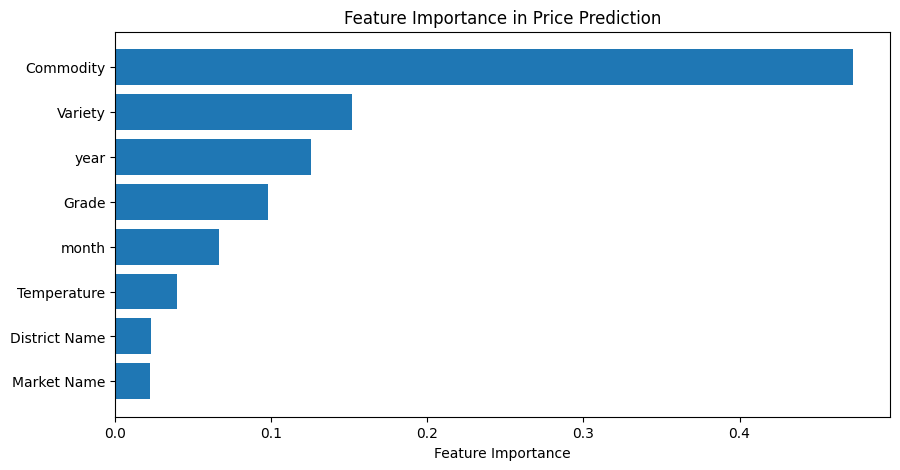

In [19]:
import matplotlib.pyplot as plt
import numpy as np

feature_importance = model.feature_importances_  # Model ka attribute
feature_names = X_train.columns  # Features ke naam

# Feature importance plot
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Price Prediction")
plt.show()


In [22]:
!pip install seaborn --quiet



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import pickle

# Save trained model
with open("model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

print("✅ Model saved successfully as model.pkl")


✅ Model saved successfully as model.pkl


In [25]:
import pickle

# Save label encoders dictionary
with open("label_encoders.pkl", "wb") as le_file:
    pickle.dump(le_dict, le_file)

print("✅ Label encoders saved successfully as label_encoders.pkl")


✅ Label encoders saved successfully as label_encoders.pkl
